In [36]:
#import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import scipy.stats as st
import tensorflow as tf

In [4]:
#import and read data
behavioral_risk_df = pd.read_csv("Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")
behavioral_risk_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
4,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,...,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15


In [5]:
unique_list = []
for c in behavioral_risk_df:
  unique_list.append({"column":c, "unique_values":len(behavioral_risk_df[c].unique())})
unique_list_df = pd.DataFrame(unique_list)
unique_list_df = unique_list_df.set_index("column", drop=True)
unique_list_df

,unique_values
column,
YearStart,11
YearEnd,11
LocationAbbr,55
LocationDesc,55
Datasource,1
Class,3
Topic,3
Question,9
Data_Value_Unit,1


In [6]:
behavioral_risk_df.keys()

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [7]:
behavioral_risk_df = behavioral_risk_df.drop(columns=['YearEnd', 'LocationAbbr', 'Datasource',
       'Class', 'Topic', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'StratificationCategoryId1', 'StratificationID1'])

In [8]:
behavioral_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88629 entries, 0 to 88628
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearStart        88629 non-null  int64  
 1   LocationDesc     88629 non-null  object 
 2   Question         88629 non-null  object 
 3   Data_Value       79851 non-null  float64
 4   Stratification1  88620 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 3.4+ MB


In [9]:
#peek at data
#behavioral_risk_df.loc[behavioral_risk_df["YearStart"] == 2020]
behavioral_risk_df["YearStart"].value_counts()

2017    13860
2019    13365
2015    10584
2013    10248
2011    10192
2021     7700
2016     4620
2018     4620
2020     4536
2014     4536
2012     4368
Name: YearStart, dtype: int64

In [10]:
behavioral_risk_df = behavioral_risk_df.loc[(behavioral_risk_df["LocationDesc"] != "National") & \
 (behavioral_risk_df["Data_Value"].notna()) & (behavioral_risk_df["Stratification1"] != "Total")]
behavioral_risk_df.head()

,YearStart,LocationDesc,Question,Data_Value,Stratification1
1,2014,Guam,Percent of adults aged 18 years and older who ...,29.3,High school graduate
5,2015,Guam,Percent of adults who achieve at least 150 min...,27.4,Hispanic
6,2012,Wyoming,Percent of adults aged 18 years and older who ...,48.5,American Indian/Alaska Native
7,2012,District of Columbia,Percent of adults aged 18 years and older who ...,31.6,Less than high school
8,2015,Puerto Rico,Percent of adults who engage in no leisure-tim...,38.1,"$25,000 - $34,999"


In [11]:
behavioral_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75110 entries, 1 to 88627
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearStart        75110 non-null  int64  
 1   LocationDesc     75110 non-null  object 
 2   Question         75110 non-null  object 
 3   Data_Value       75110 non-null  float64
 4   Stratification1  75110 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 3.4+ MB


In [12]:
behavioral_risk_df = behavioral_risk_df.pivot(index=["YearStart", "LocationDesc", "Stratification1"], columns=["Question"], values="Data_Value")
behavioral_risk_df.head()

Question                                   Percent of adults aged 18 years and older who have an overweight classification  \
YearStart LocationDesc Stratification1                                                                                       
2011      Alabama      $15,000 - $24,999                                                31.9                                 
                       $25,000 - $34,999                                                35.7                                 
                       $35,000 - $49,999                                                36.6                                 
                       $50,000 - $74,999                                                36.1                                 
                       $75,000 or greater                                               38.5                                 

Question                                   Percent of adults aged 18 years and older who have obesity  \
YearStart LocationDesc Stratification1                                                                  
2011      Alabama      $15,000 - $24,999                                                34.8            
                       $25,000 - $34,999                                                35.8            
                       $35,000 - $49,999                                                32.3            
                       $50,000 - $74,999                                                34.1            
                       $75,000 or greater                                               28.8            

Question                                   Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)  \
YearStart LocationDesc Stratification1                                                                                                                                                                                                            
2011      Alabama      $15,000 - $24,999                                                36.7                                                                                                                                                      
                       $25,000 - $34,999                                                39.3                                                                                                                                                      
                       $35,000 - $49,999                                                48.7                                                                                                                                                      
                       $50,000 - $74,999                                                41.3                                                                                                                                                      
                       $75,000 or greater                                               53.5                                                                                                                                                      

Question                                   Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week  \
YearStart LocationDesc Stratification1                                                                                                                                                                                                                                                             
2011      Alabama      $15,000 - $24,999                                                10.9   

In [13]:
behavioral_risk_df = behavioral_risk_df.reset_index()
behavioral_risk_df

Question,YearStart,LocationDesc,Stratification1,Percent of adults aged 18 years and older who have an overweight classification,Percent of adults aged 18 years and older who have obesity,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Percent of adults who engage in muscle-strengthening activities on 2 or more days a week,Percent of adults who engage in no leisure-time physical activity,Percent of adults who report consuming fruit less than one time daily,Percent of adults who report consuming vegetables less than one time daily
0,2011,Alabama,"$15,000 - $24,999",31.9,34.8,36.7,10.9,19.6,20.2,38.6,NaN,NaN
1,2011,Alabama,"$25,000 - $34,999",35.7,35.8,39.3,12.0,25.0,23.4,35.2,NaN,NaN
2,2011,Alabama,"$35,000 - $49,999",36.6,32.3,48.7,16.5,28.3,27.0,27.9,NaN,NaN
3,2011,Alabama,"$50,000 - $74,999",36.1,34.1,41.3,16.4,23.2,28.8,25.6,NaN,NaN
4,2011,Alabama,"$75,000 or greater",38.5,28.8,53.5,21.2,28.5,29.4,20.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14127,2021,Wyoming,"Less than $15,000",31.5,34.9,NaN,NaN,NaN,NaN,37.3,53.3,32.1
14128,2021,Wyoming,Less than high school,38.0,32.7,NaN,NaN,NaN,NaN,36.7,45.6,24.1
14129,2021,Wyoming,Male,41.2,32.4,NaN,NaN,NaN,NaN,20.5,45.4,21.2
14130,2021,Wyoming,Non-Hispanic White,36.6,31.3,NaN,NaN,NaN,NaN,22.3,42.5,18.1


In [31]:
#behavioral_risk_df.loc[behavioral_risk_df["LocationDesc"] == "Minnesota"]
behavioral_risk_df = behavioral_risk_df.loc[(behavioral_risk_df["YearStart"] == 2017) | (behavioral_risk_df["YearStart"] == 2019)]
#behavioral_risk_df["Stratification1"].value_counts()
behavioral_risk_df

Question,YearStart,LocationDesc,Stratification1,Percent of adults aged 18 years and older who have an overweight classification,Percent of adults aged 18 years and older who have obesity,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Percent of adults who engage in muscle-strengthening activities on 2 or more days a week,Percent of adults who engage in no leisure-time physical activity,Percent of adults who report consuming fruit less than one time daily,Percent of adults who report consuming vegetables less than one time daily
7670,2017,Alabama,"$15,000 - $24,999",31.1,40.4,37.9,13.6,23.5,22.1,42.4,46.4,25.1
7671,2017,Alabama,"$25,000 - $34,999",34.4,37.0,39.7,10.1,21.9,20.8,37.2,46.2,18.3
7672,2017,Alabama,"$35,000 - $49,999",35.8,38.3,44.0,17.0,27.5,27.3,29.5,45.5,18.3
7673,2017,Alabama,"$50,000 - $74,999",34.5,38.8,43.9,15.0,25.7,24.5,28.1,42.7,14.4
7674,2017,Alabama,"$75,000 or greater",38.5,31.9,55.5,25.7,33.9,37.7,17.8,39.5,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...
11519,2019,Wyoming,"Less than $15,000",25.9,33.0,48.0,19.1,31.0,27.7,35.8,53.2,35.5
11520,2019,Wyoming,Less than high school,38.2,34.4,39.2,13.6,25.2,28.0,36.5,49.9,31.7
11521,2019,Wyoming,Male,40.5,30.7,53.9,26.6,35.8,41.9,25.6,46.3,20.4
11522,2019,Wyoming,Non-Hispanic White,35.9,29.8,54.8,24.4,36.2,37.6,24.3,42.0,17.2


In [32]:
behavioral_risk_df = behavioral_risk_df.dropna()
behavioral_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2537 entries, 7670 to 11523
Data columns (total 12 columns):
 #   Column                                                                                                                                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                 --------------  -----  
 0   YearStart                                                                                                                                                                                                                                              2537 non-null   int64  
 1   LocationDesc                                            

In [ ]:
#clean up NaN's

In [33]:
X = behavioral_risk_df.drop(columns=["Percent of adults aged 18 years and older who have obesity"])
y = behavioral_risk_df["Percent of adults aged 18 years and older who have obesity"]

In [34]:
X = pd.get_dummies(X)
X.head()

,YearStart,Percent of adults aged 18 years and older who have an overweight classification,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Percent of adults who engage in muscle-strengthening activities on 2 or more days a week,Percent of adults who engage in no leisure-time physical activity,Percent of adults who report consuming fruit less than one time daily,Percent of adults who report consuming vegetables less than one time daily,LocationDesc_Alabama,...,Stratification1_Hawaiian/Pacific Islander,Stratification1_High school graduate,Stratification1_Hispanic,"Stratification1_Less than $15,000",Stratification1_Less than high school,Stratification1_Male,Stratification1_Non-Hispanic Black,Stratification1_Non-Hispanic White,Stratification1_Other,Stratification1_Some college or technical school
7670,2017,31.1,37.9,13.6,23.5,22.1,42.4,46.4,25.1,1,...,0,0,0,0,0,0,0,0,0,0
7671,2017,34.4,39.7,10.1,21.9,20.8,37.2,46.2,18.3,1,...,0,0,0,0,0,0,0,0,0,0
7672,2017,35.8,44.0,17.0,27.5,27.3,29.5,45.5,18.3,1,...,0,0,0,0,0,0,0,0,0,0
7673,2017,34.5,43.9,15.0,25.7,24.5,28.1,42.7,14.4,1,...,0,0,0,0,0,0,0,0,0,0
7674,2017,38.5,55.5,25.7,33.9,37.7,17.8,39.5,10.6,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.32)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [75]:
#create optimized model
optimized_model = tf.keras.models.Sequential()
optimized_model.add(tf.keras.layers.Dense(units=64, activation="relu", input_dim=89))
optimized_model.add(tf.keras.layers.Dense(units=4, activation="relu"))
optimized_model.add(tf.keras.layers.Dense(units=1))
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
optimized_model.compile(loss="mean_absolute_error", optimizer=opt)

In [76]:
optimized_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                5760      
                                                                 
 dense_22 (Dense)            (None, 4)                 260       
                                                                 
 dense_23 (Dense)            (None, 1)                 5         
                                                                 
Total params: 6,025
Trainable params: 6,025
Non-trainable params: 0
_________________________________________________________________


In [77]:
# Train the model
optimized_model_fit = optimized_model.fit(X_train_scaled, y_train, epochs=175, validation_data=(X_test_scaled, y_test))

Epoch 1/175
54/54 [==============================] - 1s 6ms/step - loss: 31.8467 - val_loss: 31.7594
Epoch 2/175
54/54 [==============================] - 0s 3ms/step - loss: 31.6911 - val_loss: 31.6192
Epoch 3/175
54/54 [==============================] - 0s 4ms/step - loss: 31.5654 - val_loss: 31.5030
Epoch 4/175
54/54 [==============================] - 0s 4ms/step - loss: 31.4560 - val_loss: 31.3922
Epoch 5/175
54/54 [==============================] - 0s 3ms/step - loss: 31.3462 - val_loss: 31.2749
Epoch 6/175
54/54 [==============================] - 0s 3ms/step - loss: 31.2260 - val_loss: 31.1457
Epoch 7/175
54/54 [==============================] - 0s 3ms/step - loss: 31.0908 - val_loss: 31.0034
Epoch 8/175
54/54 [==============================] - 0s 3ms/step - loss: 30.9405 - val_loss: 30.8446
Epoch 9/175
54/54 [==============================] - 0s 3ms/step - loss: 30.7736 - val_loss: 30.6702
Epoch 10/175
54/54 [==============================] - 0s 4ms/step - loss: 30.5899 - val_los

In [78]:
test_results = optimized_model.evaluate(X_test_scaled, y_test, verbose=2)

26/26 - 0s - loss: 2.6131 - 51ms/epoch - 2ms/step


In [79]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(optimized_model_fit.history, index=range(1,len(optimized_model_fit.history["loss"])+1))

<Axes: >

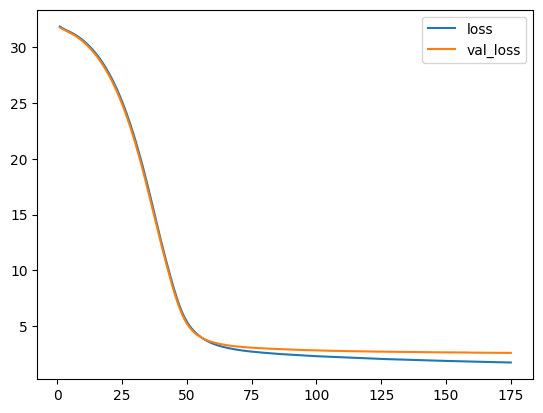

In [80]:
# Plot the accuracy
history_df.plot(y=["loss","val_loss"])

<Axes: xlabel='Stratification1', ylabel='Percent of adults who engage in no leisure-time physical activity'>

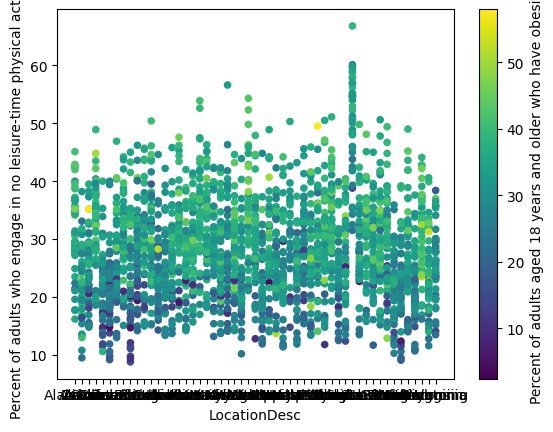

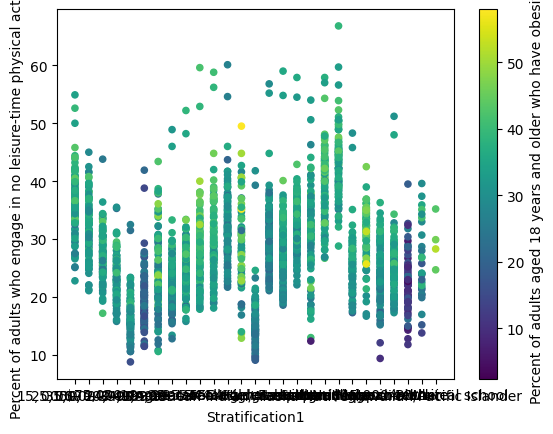

In [59]:
behavioral_risk_df.plot.scatter(x="LocationDesc", y="Percent of adults who engage in no leisure-time physical activity", c="Percent of adults aged 18 years and older who have obesity")
behavioral_risk_df.plot.scatter(x="Stratification1", y="Percent of adults who engage in no leisure-time physical activity", c="Percent of adults aged 18 years and older who have obesity")